# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

from lightgbm import LGBMRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

## Training the LGBM model

### Grid Search

In [5]:
'''
param = [{'booster': ['gbtree', 'goss', 'dart', 'rf'],
          'learning_rate': [0.001, 0.01, 0.1],
          'n_estimators': [100, 200, 300, 400, 500],
          'max_depth': [-1, 3, 5],
          'num_leaves': [31, 50]}]
'''

param = [{'booster': ['gbtree', 'goss', 'dart'],
          'learning_rate': [0.05, 0.1],
          'n_estimators': [50, 100, 500, 1000],
          'num_leaves': [31, 21],
          'feature_fraction': [0.5, 1.0],
          'bagging_fraction': [0.75, 0.95], 
          'reg_alpha': [0.1, 0.5]}]

gs = GridSearchCV(LGBMRegressor(random_state = 0, bagging_freq=5), param_grid=param, scoring='r2', cv = 10)
gs.fit(X_train_sc, y_train_sc.ravel())

model = gs.best_estimator_
print(gs.best_params_)

{'bagging_fraction': 0.75, 'booster': 'gbtree', 'feature_fraction': 0.5, 'learning_rate': 0.05, 'n_estimators': 1000, 'num_leaves': 31, 'reg_alpha': 0.1}


### Cross Validation (R-Squared)

,Scores
Split 1,0.90564
Split 2,0.92836
Split 3,0.87427
Split 4,0.93926
Split 5,0.88372
Split 6,0.91254
Split 7,0.91142
Split 8,0.93828
Split 9,0.93286
Split 10,0.94686


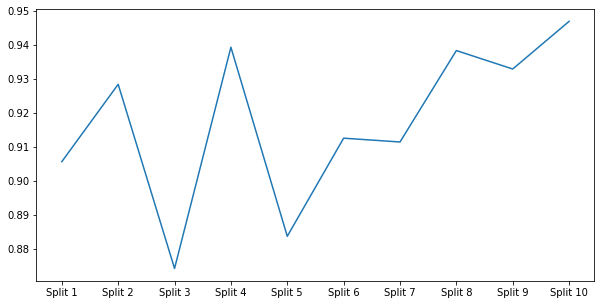

In [6]:
cv_scores(model, X_train_sc, y_train_sc)

### Testing data

,Value
Metric,
R2 Score,0.927664
MAE,43026.177840
RMSE,56303.542295


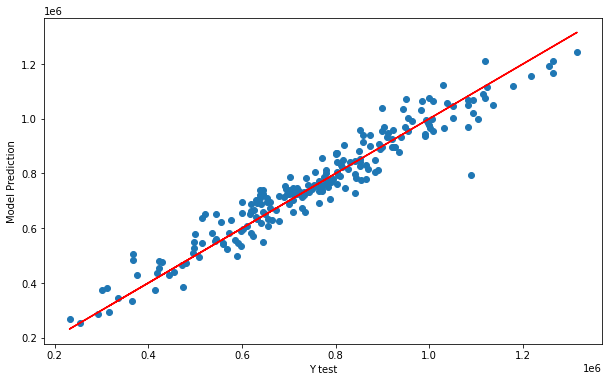

In [7]:
y_pred = model.predict(X_test_sc)

report(y_test, sc_y.inverse_transform(y_pred))